In [50]:
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np
import os
import pandas as pd # Optional, but can be useful

def plot_norms_and_similarity_dual_axis(data_path: str):
    """
    Loads norms and similarity data, creates a plot with dual Y-axes:
    - Left Y-axis: Activation Similarity
    - Right Y-axis: Activation Norm, Delta Norm
    - X-axis: Steps
    Saves the plot to a file.

    Args:
        data_path: Path to the saved norms & similarity data file 
                   (e.g., 'average_norms_and_similarity_vs_steps.pt').
        # Removed output_plot_path as it wasn't used and plot is shown inline
    """
    # Set Seaborn style for better aesthetics
    sns.set_theme(style="whitegrid")
    # Use a slightly larger font scale for better readability
    sns.set_context("notebook", font_scale=1.2) 

    # --- Load Data ---
    if not os.path.exists(data_path):
        raise FileNotFoundError(f"Data file not found at: {data_path}. Please check the path.")
    
    print(f"Loading data from: {data_path}")
    try:
        data = torch.load(data_path)
        print(f"Loaded keys: {list(data.keys())}")
        
        # Verify required keys exist
        required_keys = ['steps', 'avg_act_norms', 'avg_delta_norms', 'avg_act_similarities']
        if not all(key in data for key in required_keys):
            missing = [key for key in required_keys if key not in data]
            raise KeyError(f"Data file missing required keys: {missing}")

    except Exception as e:
        print(f"Error loading or verifying data from {data_path}: {e}")
        return

    # --- Prepare Data for Plotting (Filter None values) ---
    # Skip step 0 as per notebook
    steps_raw = data['steps']
    if not steps_raw: # Handle empty steps
        print("No steps data found.")
        return
        
    start_index = 1 if steps_raw[0] == 0 else 0 # Find index to start from (skip step 0 if present)
    
    steps = [s + 1 for s in steps_raw[start_index:]] # Adjust steps to start from 1
    avg_act_norms = data['avg_act_norms'][start_index:]
    avg_delta_norms = data['avg_delta_norms'][start_index:]
    avg_act_similarities = data['avg_act_similarities'][start_index:]

    # Filter out None values, keeping corresponding steps
    plot_data = {}
    valid_indices_sim = [i for i, x in enumerate(avg_act_similarities) if x is not None]
    plot_data['steps_sim'] = [steps[i] for i in valid_indices_sim]
    plot_data['sim_act'] = [avg_act_similarities[i] for i in valid_indices_sim]

    valid_indices_act_norm = [i for i, x in enumerate(avg_act_norms) if x is not None]
    plot_data['steps_act_norm'] = [steps[i] for i in valid_indices_act_norm]
    plot_data['norm_act'] = [avg_act_norms[i] for i in valid_indices_act_norm]

    valid_indices_delta_norm = [i for i, x in enumerate(avg_delta_norms) if x is not None]
    plot_data['steps_delta_norm'] = [steps[i] for i in valid_indices_delta_norm]
    plot_data['norm_delta'] = [avg_delta_norms[i] for i in valid_indices_delta_norm]

    # --- Create Plot with Dual Y-Axes ---
    # Slightly increased figure height for better spacing
    fig, ax1 = plt.subplots(figsize=(6, 4.5)) # Adjusted figsize
    # fig.suptitle('Norms and Similarity vs. Training Steps', y=1.02, fontsize=16) # Title removed as per notebook

    # Configure Axis 1 (Left - Similarity)
    color_sim = 'black'
    ax1.set_xlabel('Steps', fontsize=14) # Increased label font size
    ax1.set_ylabel('Activation Similarity', fontsize=14) # Increased label font size
    line1 = None
    if plot_data['steps_sim']:
        line1, = ax1.plot(plot_data['steps_sim'], plot_data['sim_act'], 
                          color=color_sim, marker=None, linestyle='--', linewidth=2, # Added linewidth
                          label='Cosine Similarity')
    else:
        ax1.text(0.5, 0.5, 'No Similarity Data', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, color=color_sim)
        
    ax1.tick_params(axis='y', labelsize=12) # Increased tick label size
    ax1.tick_params(axis='x', labelsize=12) # Increased tick label size
    ax1.set_ylim(0, 1) # Set similarity range
    ax1.grid(True, axis='y', linestyle='--', alpha=0.6) # Slightly less transparent grid

    # Configure Axis 2 (Right - Norms)
    ax2 = ax1.twinx()  
    color_norm_act = 'teal'
    color_norm_delta = 'orange'
    # Renamed label as per plot image
    ax2.set_ylabel('Frobenius Norm', color='black', fontsize=14) # Set color to black for general label
    
    lines = []
    if line1: lines.append(line1) 

    line2, line3 = None, None # Initialize lines
    if plot_data['steps_act_norm']:
        line2, = ax2.plot(plot_data['steps_act_norm'], plot_data['norm_act'], 
                          color=color_norm_act, marker=None, linestyle='-', linewidth=2, # Added linewidth
                          label='Activation Norm')
        lines.append(line2)
        
    if plot_data['steps_delta_norm']:
        # Labelled Residual Norm as per plot image
        line3, = ax2.plot(plot_data['steps_delta_norm'], plot_data['norm_delta'], 
                          color=color_norm_delta, marker=None, linestyle='-', linewidth=2, # Added linewidth
                          label='Residual Norm') 
        lines.append(line3)

    ax2.tick_params(axis='y', labelcolor='black', labelsize=12) # Set color to black, increased size
    ax2.set_ylim(bottom=0, top=3000) # Set norm range based on plot image

    # --- Create Unified Legend ---
    if lines: 
        labels = [l.get_label() for l in lines]
        # Adjusted bbox_to_anchor to move legend further down (-0.2 instead of -0.1)
        ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.3), 
                   fancybox=True, shadow=False, ncol=2, fontsize=12) # Increased legend font size

    # --- Final Adjustments & Show ---
    # Adjusted bottom margin in tight_layout to give more space
    fig.tight_layout(rect=[0, 0.1, 1, 0.98]) # Increased bottom margin from 0.05 to 0.1
    plt.show()

# Example call (replace with your actual path)
# plot_norms_and_similarity_dual_axis(data_path='sim_norm_dump/average_norms_and_similarity_vs_steps_original.pt') 

Loading data from: sim_norm_dump/average_norms_and_similarity_vs_steps_original.pt
Loaded keys: ['steps', 'avg_act_norms', 'avg_delta_norms', 'avg_act_similarities']


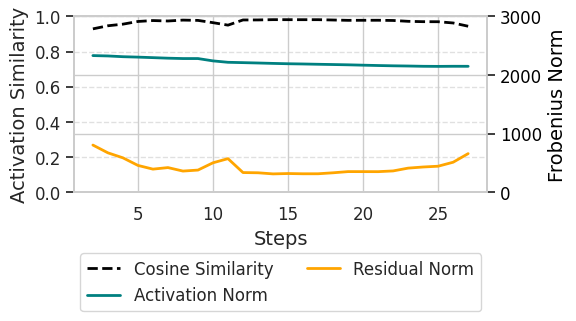

In [51]:
plot_norms_and_similarity_dual_axis(
    data_path='sim_norm_dump/average_norms_and_similarity_vs_steps_original.pt',
)